In [2]:
import pandas as pd

# Load the dataset to take a look at the first few rows and understand its structure
data_path = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(data_path)

df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


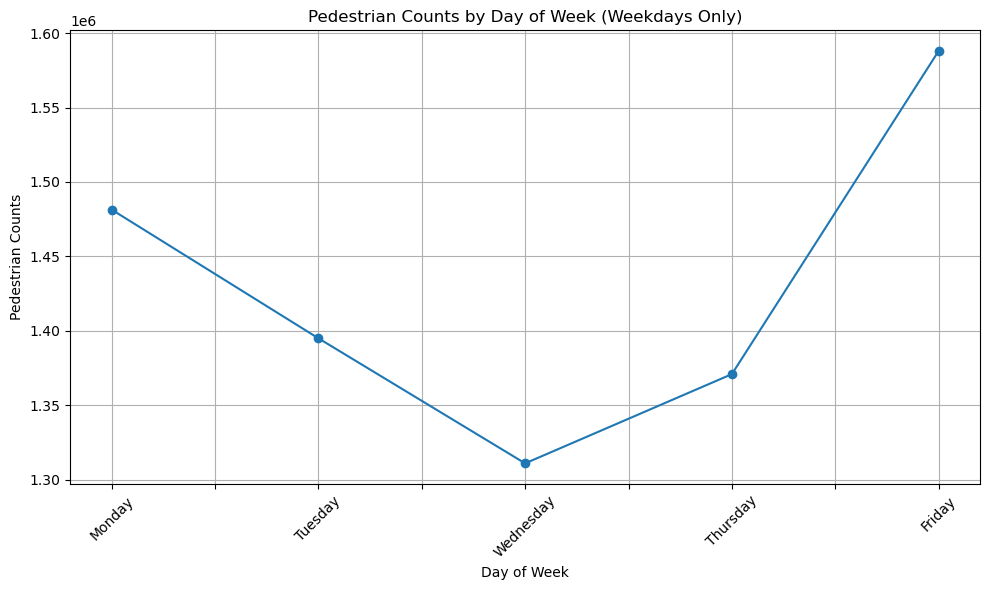

In [13]:
import matplotlib.pyplot as plt
import datetime

# Convert 'hour_beginning' to datetime and extract the day of the week
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()

# Filter data to include only weekdays
weekday_df = df[df['hour_beginning'].dt.dayofweek < 5]  # Monday=0, Sunday=6

# Aggregate pedestrian counts by day of the week
weekday_counts = weekday_df.groupby('day_of_week')['Pedestrians'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# Plotting
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title('Pedestrian Counts by Day of Week (Weekdays Only)')
plt.xlabel('Day of Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Filter the dataset for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]

# Aggregate pedestrian counts by weather summary
weather_pedestrians = df_2019.groupby('weather_summary')['Pedestrians'].sum()

# Prepare data for correlation analysis
# For simplicity and demonstrative purposes, let's create a DataFrame that includes average temperature,
# total precipitation, and total pedestrian counts per weather summary
weather_analysis_df = df_2019.groupby('weather_summary').agg({
    'Pedestrians': 'sum',
    'temperature': 'mean',
    'precipitation': 'sum'
}).dropna()

weather_analysis_df.corr()


,Pedestrians,temperature,precipitation
Pedestrians,1.000000,0.678537,-0.156237
temperature,0.678537,1.000000,0.153477
precipitation,-0.156237,0.153477,1.000000


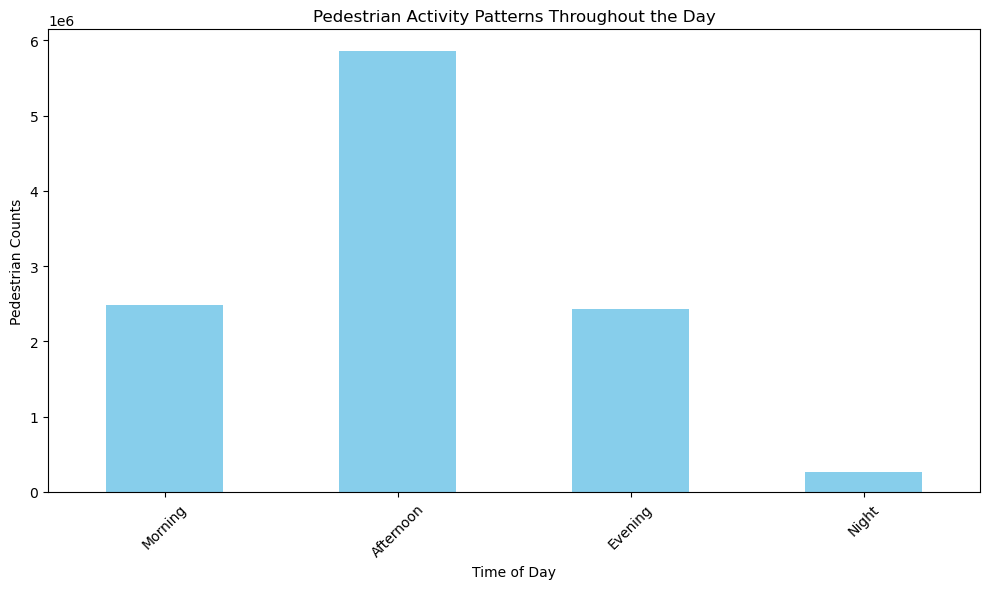

In [5]:
# Custom function to categorize time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the custom function to the 'hour_beginning' column to categorize time of day
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Analyze pedestrian activity patterns throughout the day
time_of_day_activity = df.groupby('time_of_day')['Pedestrians'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plotting
plt.figure(figsize=(10, 6))
time_of_day_activity.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
